In [23]:
import os
import pandas as pd
from pathlib import Path

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# dir_path = os.path.dirname(os.path.abspath(''))
dir_path = globals()['_dh'][0]

df = pd.read_csv(os.path.join(dir_path, "traffic_vs_load_ratio.csv"))

In [12]:
df

,load_ratio,traffic_chi2,traffic_uniform,traffic_exponential
0,1.000000,2.028629,1.943189,2.969479
1,0.500000,1.016435,1.048363,1.467889
2,0.333333,0.687690,0.737619,0.987505
3,0.250000,0.523851,0.576505,0.749299
4,0.200000,0.425196,0.476697,0.606147
5,0.166667,0.359023,0.408248,0.510204
6,0.142857,0.311419,0.358107,0.441211
7,0.111111,0.247269,0.289098,0.348022
8,0.090909,0.205850,0.243489,0.288310
9,1.500000,3.083639,2.818006,4.565255


In [14]:
df_sorted = df.sort_values(by=['load_ratio'])

In [15]:
df_sorted.head()

,load_ratio,traffic_chi2,traffic_uniform,traffic_exponential
8,0.090909,0.205850,0.243489,0.288310
7,0.111111,0.247269,0.289098,0.348022
6,0.142857,0.311419,0.358107,0.441211
5,0.166667,0.359023,0.408248,0.510204
4,0.200000,0.425196,0.476697,0.606147


In [21]:
def plot_expon_chi2_uniform(rv_expon, rv_chi2, rv_uniform):

    lst_rv = []
    lst_rv.append(rv_expon)
    lst_rv.append(rv_chi2)
    lst_rv.append(rv_uniform)

    plt.figure(figsize=(10, 10))
    for rv, rv_name in zip(lst_rv, ["exponential", "chi2", "uniform"]):
        x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
        plt.plot(x, rv.pdf(x), lw=2, alpha=0.6, label=rv_name)
        # plt.plot(x, [shifted_exponential_pdf(t, mu=scale_n, lower_bd=loc) for t in x])

    plt.legend()
    plt.savefig("exponential_chi2_uniform_pdf.png")
    plt.show()

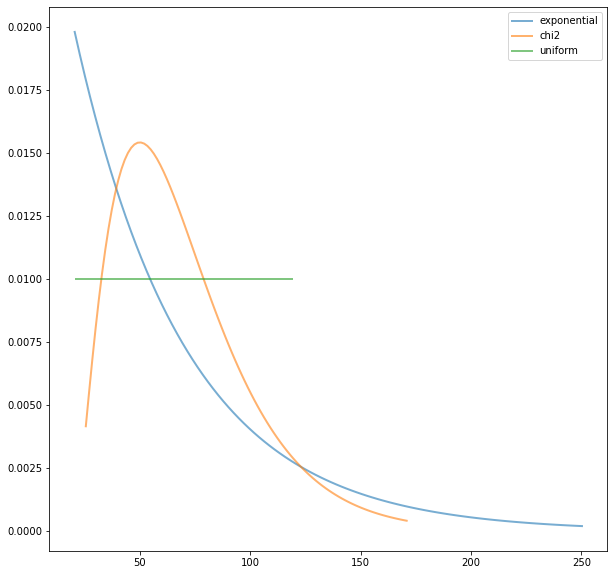

In [25]:
loc = 20
rv_expon = stats.expon(loc=loc, scale=50)
rv_chi2 = stats.chi2(df=5, loc=loc, scale=10)
rv_uniform = stats.uniform(loc=20, scale=100)
plot_expon_chi2_uniform(rv_expon, rv_chi2, rv_uniform)

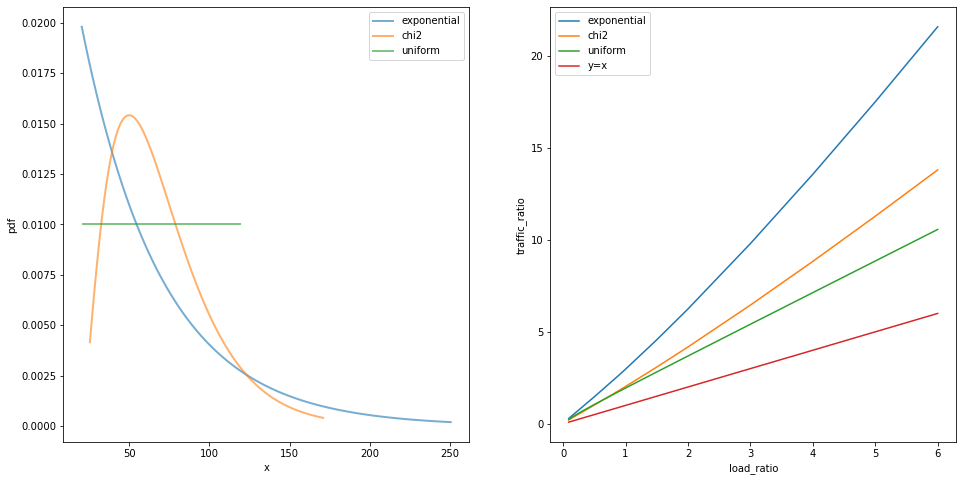

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[1].plot(df_sorted['load_ratio'], df_sorted['traffic_exponential'], label='exponential')
ax[1].plot(df_sorted['load_ratio'], df_sorted['traffic_chi2'], label='chi2')
ax[1].plot(df_sorted['load_ratio'], df_sorted['traffic_uniform'], label='uniform')
ax[1].plot(df_sorted['load_ratio'], df_sorted['load_ratio'], label='y=x')
ax[1].set_ylabel('traffic_ratio')
ax[1].set_xlabel('load_ratio')
ax[1].legend()

loc = 20
rv_expon = stats.expon(loc=loc, scale=50)
rv_chi2 = stats.chi2(df=5, loc=loc, scale=10)
rv_uniform = stats.uniform(loc=20, scale=100)
lst_rv = []
lst_rv.append(rv_expon)
lst_rv.append(rv_chi2)
lst_rv.append(rv_uniform)
for rv, rv_name in zip(lst_rv, ["exponential", "chi2", "uniform"]):
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    ax[0].plot(x, rv.pdf(x), lw=2, alpha=0.6, label=rv_name)
ax[0].set_ylabel('pdf')
ax[0].set_xlabel('x')
ax[0].legend()
plt.savefig('pdf_and_traffic_vs_load_ratio.png')
plt.show()

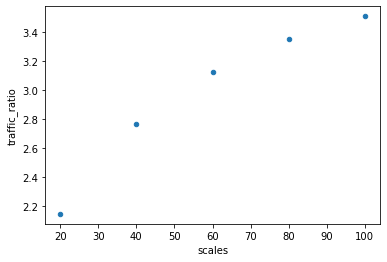

In [7]:
# dir_path = os.path.dirname(os.path.abspath(''))
dir_path = globals()['_dh'][0]

df = pd.read_csv(os.path.join(dir_path, "traffic_ratio_vs_scales_weibull.csv"))
df.plot(x="scales", y="traffic_ratio", kind="scatter")
plt.show()